In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
df = pd.read_csv(r'water_potability.csv')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

# Data Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


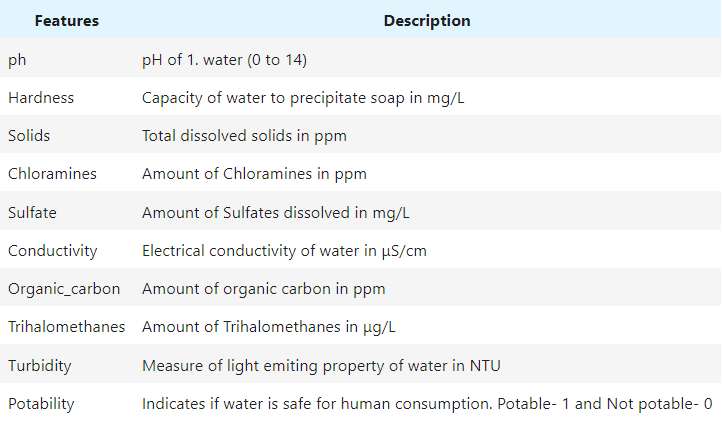

In [83]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [84]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [85]:
df.shape

(3276, 10)

# Data Pre-Processing

In [86]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [87]:
for col in ['ph','Trihalomethanes','Sulfate']:
    missing_label_0 = df.query('Potability == 0')[col][df[col].isna()].index
    df.loc[missing_label_0,col] = df.query('Potability == 0')[col][df[col].notna()].mean()
    missing_label_1 = df.query('Potability == 1')[col][df[col].isna()].index
    df.loc[missing_label_1,col] = df.query('Potability == 1')[col][df[col].notna()].mean()

In [88]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [89]:
df.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   7.085378  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246  334.564290    592.885359   
2   8.099124  224.236259  19909.541732     9.275884  334.564290    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8   7.085378  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

# Data Visualization

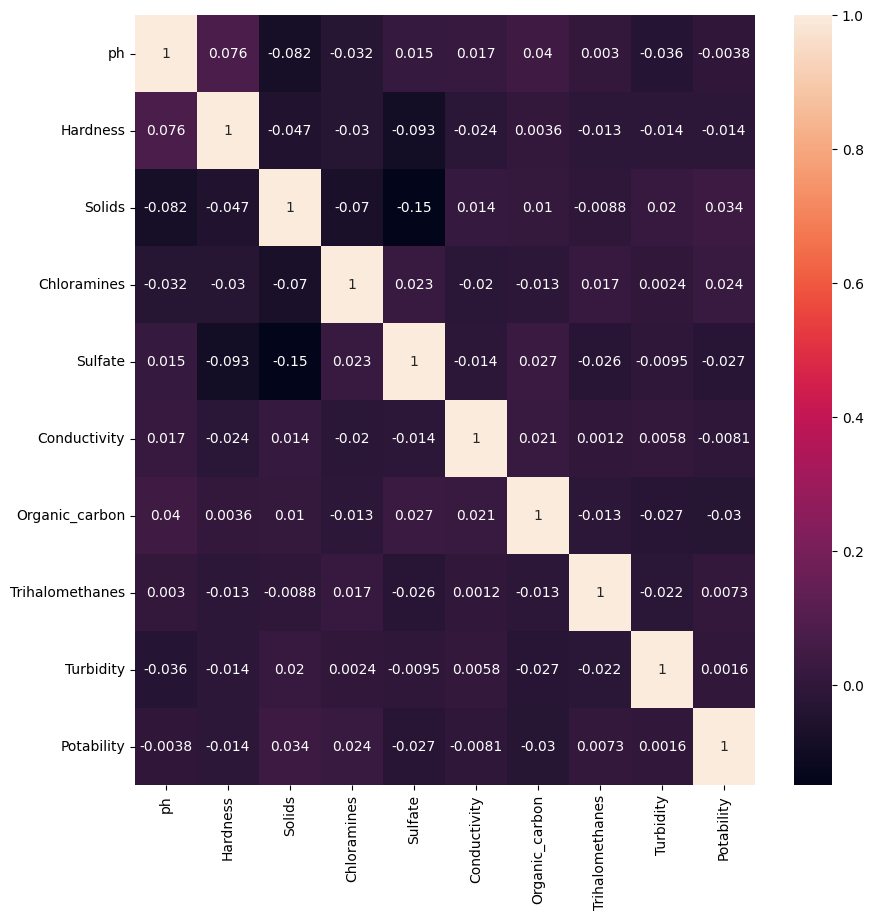

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Here, we can see that Solids is correlating well as per heatmap. Here in this map, potability is showing 0.034(highest positive value) with relation to Solids.

In [91]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.3, random_state=42)

In [92]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [93]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [94]:
x.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080855   196.369496  22014.092526     7.122277   333.785123   
std       1.469958    32.879761   8768.570828     1.583085    36.145701   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.085378   196.967627  20927.833607     7.130299   334.564290   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.395671     3.966786  
std       80.824064        3.308162        15.769901     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.303555     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

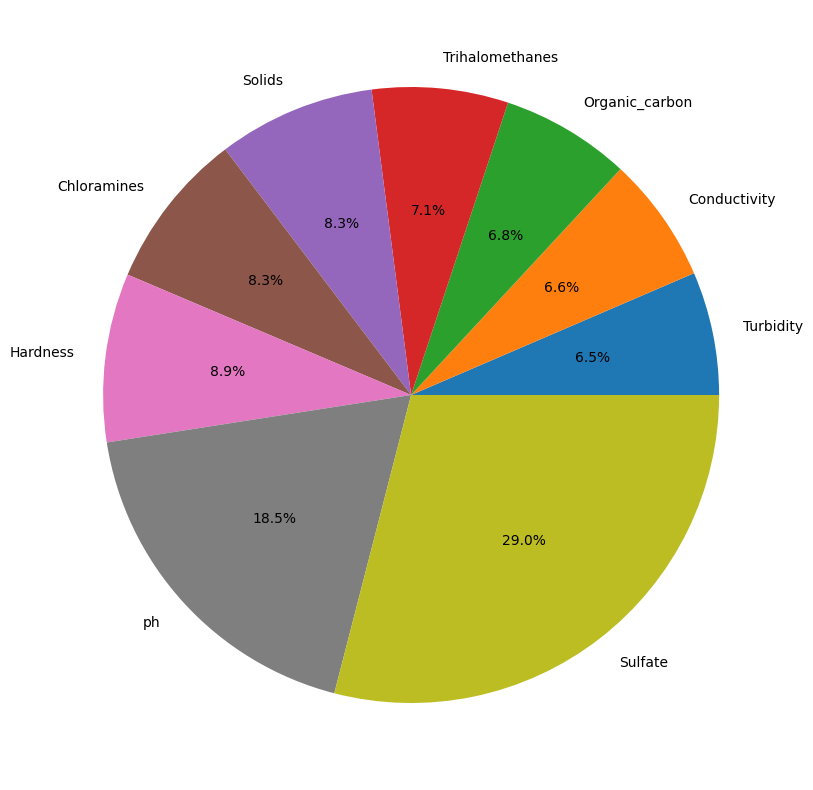

In [95]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

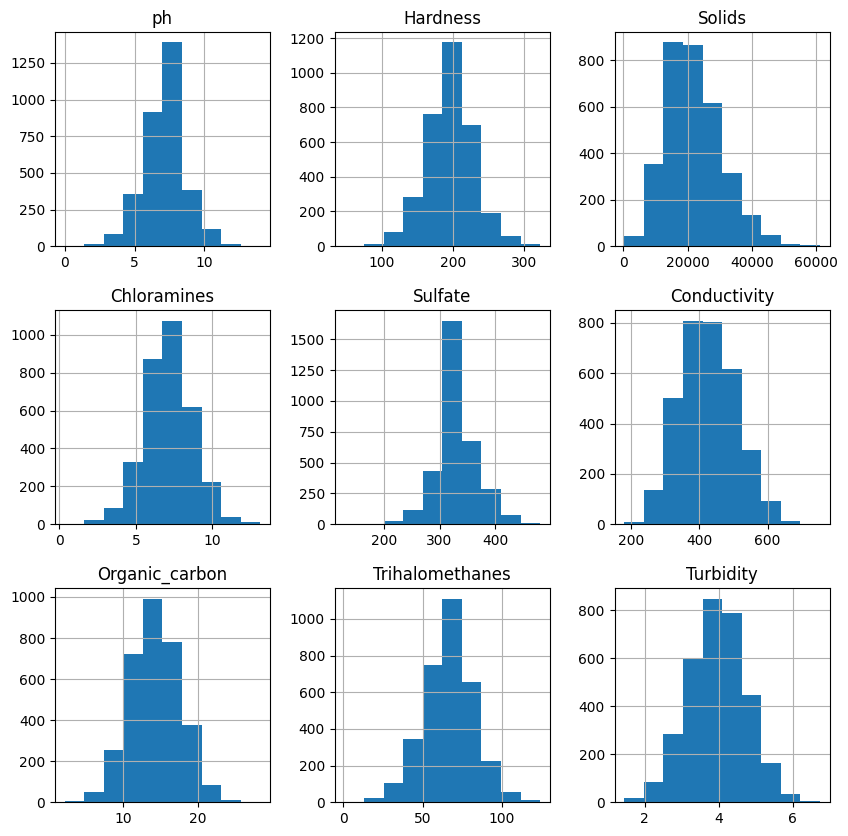

In [96]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

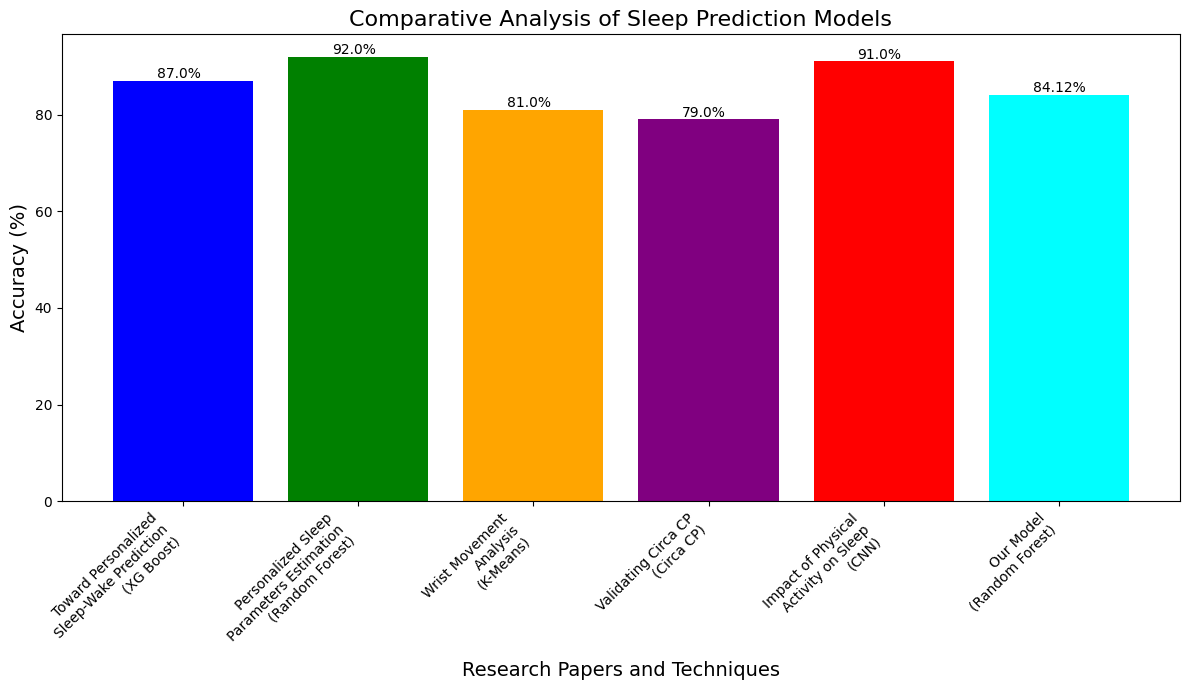

In [1]:
import matplotlib.pyplot as plt

# Data
papers = [
    "Toward Personalized\nSleep-Wake Prediction\n(XG Boost)",
    "Personalized Sleep\nParameters Estimation\n(Random Forest)",
    "Wrist Movement\nAnalysis\n(K-Means)",
    "Validating Circa CP\n(Circa CP)",
    "Impact of Physical\nActivity on Sleep\n(CNN)",
    "Our Model\n(Random Forest)"
]
accuracies = [87.00, 92.00, 81.00, 79.00, 91.00, 84.12]

# Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(papers, accuracies, color=['blue', 'green', 'orange', 'purple', 'red', 'cyan'])

# Annotate bars with accuracy values
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5, f"{accuracy}%", fontsize=10)

# Labels and Title
plt.title("Comparative Analysis of Sleep Prediction Models", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Research Papers and Techniques", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()



All features have a very similar distribution of their values. In addition, they all show a very gaussian form so there is no need to normalize any feature.

<Axes: xlabel='ph', ylabel='Count'>

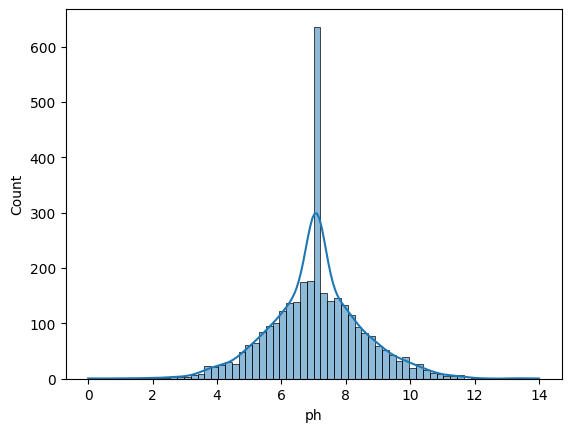

In [97]:
sns.histplot(df.ph,kde = True)

We represented the distribution of ph variable by counting the number of observations that fall within disrete bins. We use kde parameter which if True, computes a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s) which is only relevant with univariate data.

In [98]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

count        mean        std      min         25%  \
ph               3276.0    7.080855   1.469958    0.000    6.277673   
Sulfate          3276.0  333.785123  36.145701  129.000  317.094638   
Trihalomethanes  3276.0   66.395671  15.769901    0.738   56.647656   

                        50%         75%         max  
ph                 7.085378    7.870050   14.000000  
Sulfate          334.564290  350.385756  481.030642  
Trihalomethanes   66.303555   76.666609  124.000000

<Axes: xlabel='ph', ylabel='Sulfate'>

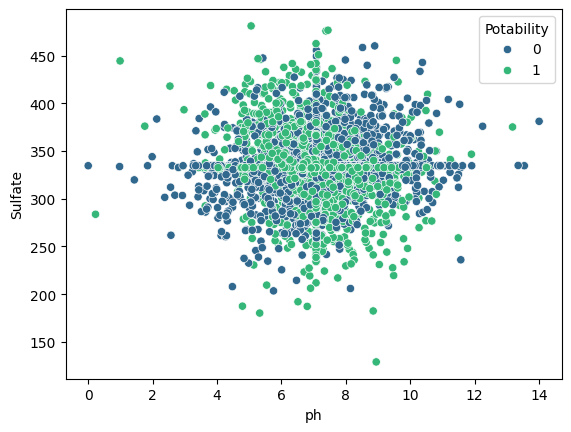

In [99]:
sns.scatterplot(data = df, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

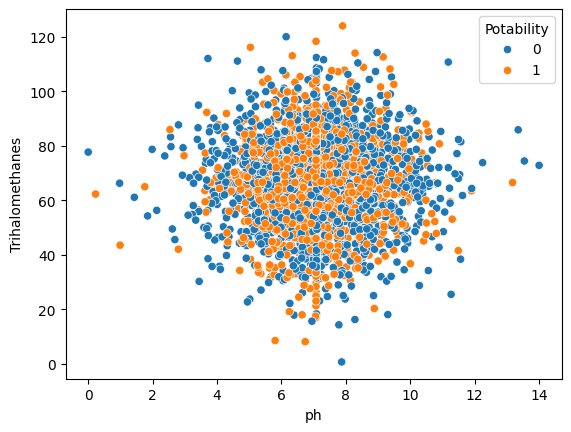

In [100]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")

<Axes: xlabel='Trihalomethanes', ylabel='Sulfate'>

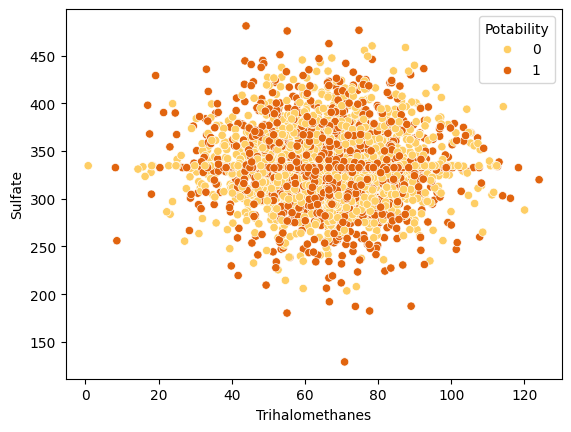

In [101]:
sns.scatterplot(data = df, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="YlOrBr")


We use scatterplot to visualize and represent the values of two variables with 'Potability' as hue (which is a grouping variable). We divide data points into groups based on how closely the sets of points cluster together.

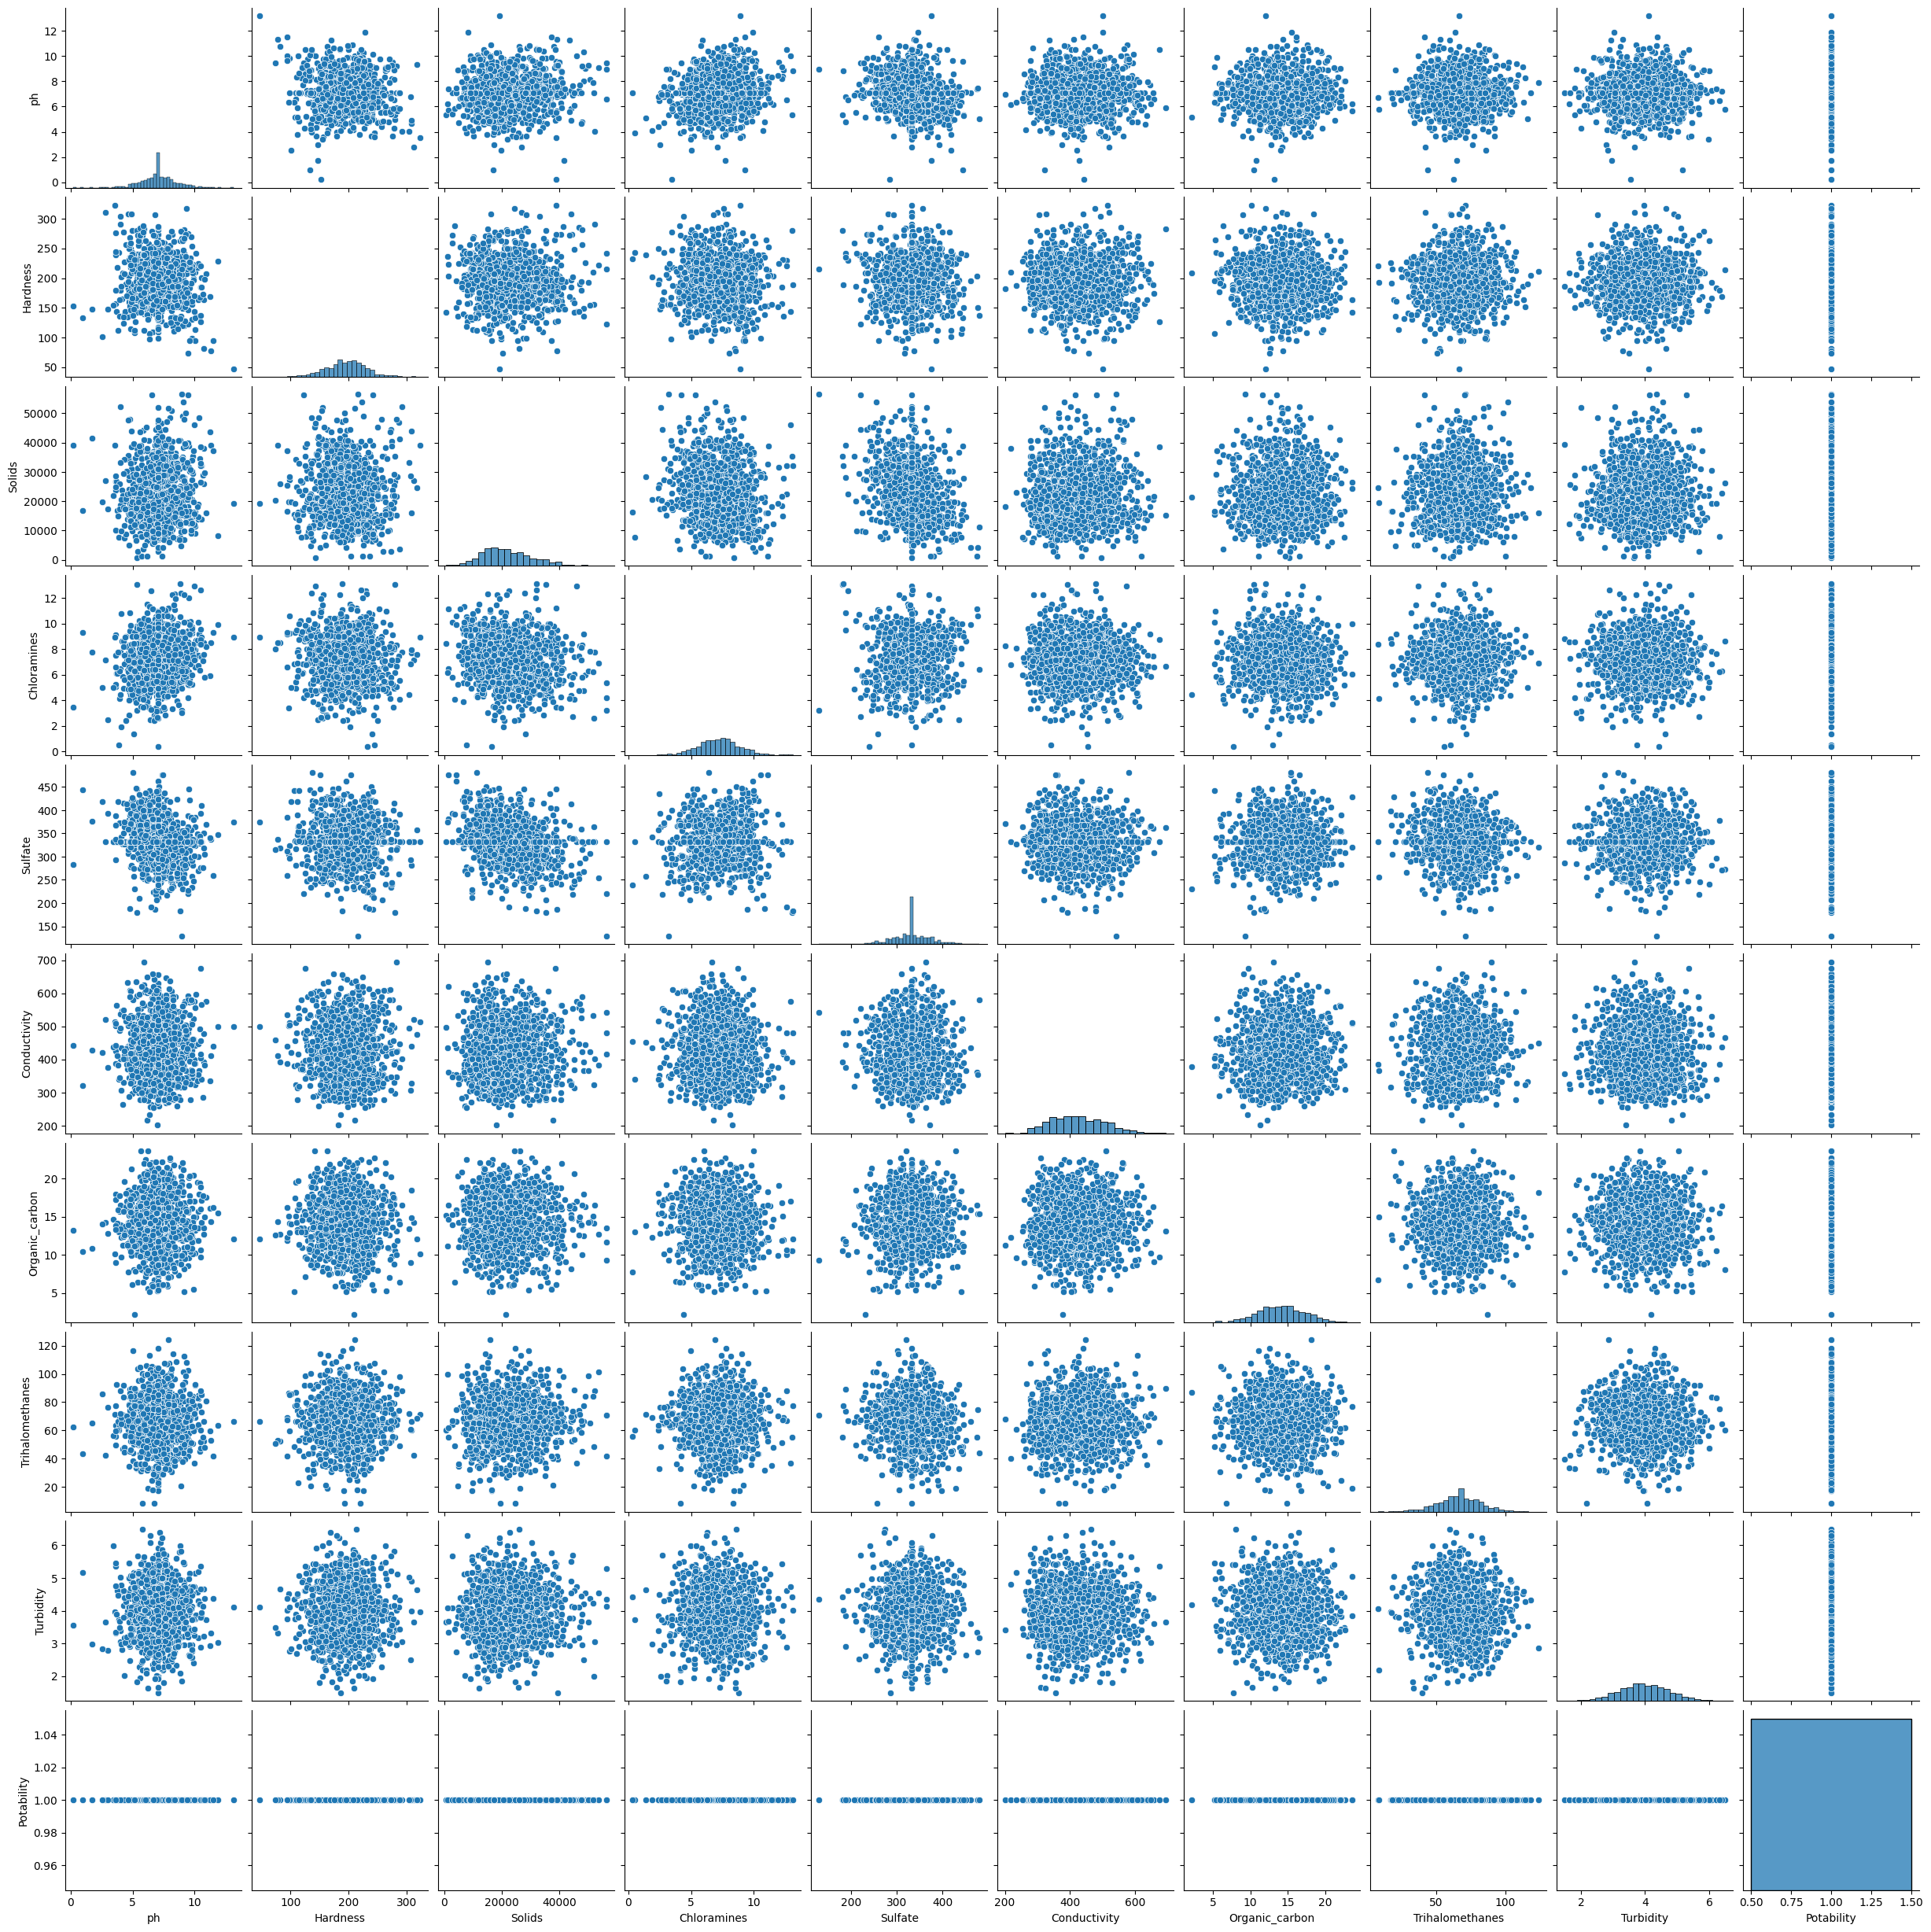

In [102]:
positive = df[df['Potability'] == 1]
sns.pairplot(positive)

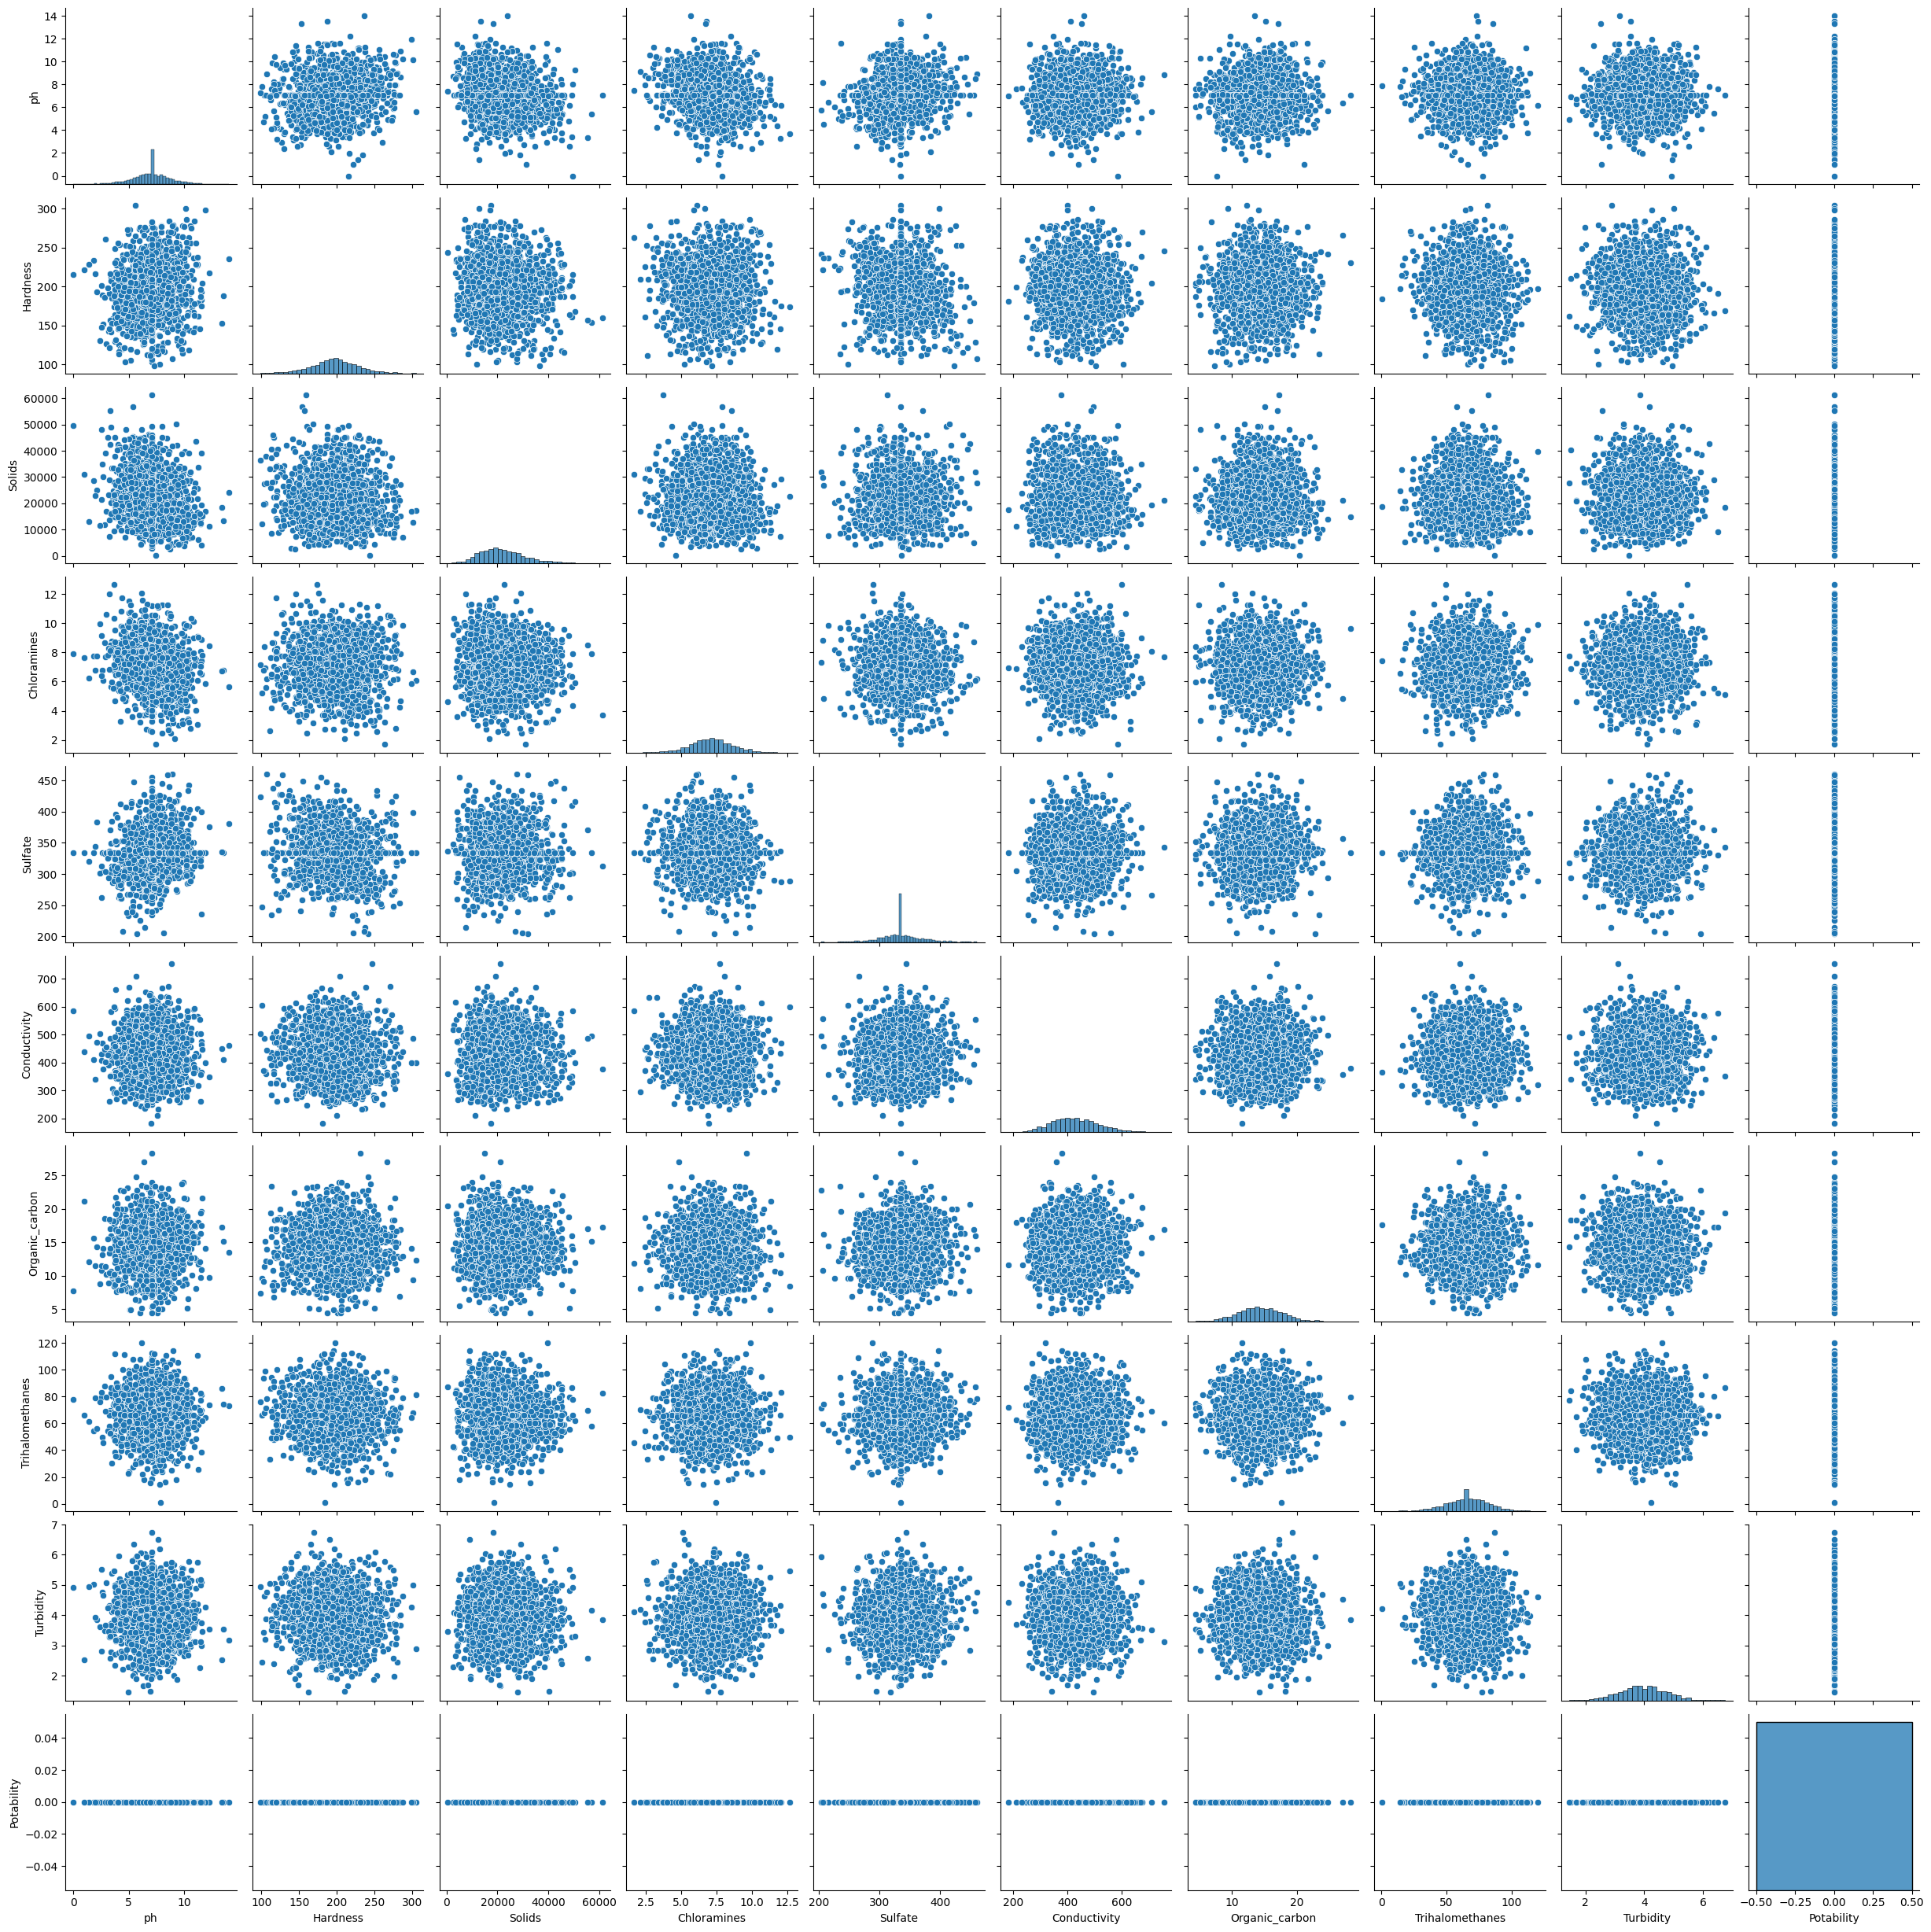

In [103]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)

Using pair plot we can see both the distribution of single variables and relationships between two variables.

# Model Implementation



**KNN IMPLEMENTATION**

In [104]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
from sklearn.preprocessing import StandardScaler
import pickle

# Your existing preprocessing and model training code
scaler = StandardScaler()
X_stdscle = scaler.fit_transform(X.values)



# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


**Hyperparamter in KNN is**

1. k: nearest neigbors which we compute while training the model. default:5

2. p: Power parameter for the minkowski metric. When p = 1, this is equivalent to using manhattan_distance,and euclidean_distance for p = 2.(default = 2)

3. metric: str or callable, default=’minkowski’.The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

**RESULT 1**

In [105]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [106]:
KNeighborsClassifier()

KNeighborsClassifier()

1. k: Here we have taken nearest neighbor as 5(default value).

2. p: Taken p=2 to find euclidean_distance (default value)

3. metric: We have taken default=’minkowski’(default value)

In [107]:
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  76.01400000000001
Test Accuracy :  61.851
Confusion Matrix:
[[439 146]
 [229 169]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       585
           1       0.54      0.42      0.47       398

    accuracy                           0.62       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.61      0.62      0.61       983



**RESULT 2**

In [108]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

1. k: Here we have taken nearest neighbor as 3.
2. p: Taken p=2 to find euclidean_distance
3. metric: We have taken default=’minkowski’

In [110]:
#printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  81.291
Test Accuracy :  61.44500000000001
Confusion Matrix:
[[422 163]
 [216 182]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       585
           1       0.53      0.46      0.49       398

    accuracy                           0.61       983
   macro avg       0.59      0.59      0.59       983
weighted avg       0.61      0.61      0.61       983




**RESULT 3**

In [111]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [112]:
KNeighborsClassifier(n_neighbors=2, p=1)

KNeighborsClassifier(n_neighbors=2, p=1)

1. k: Here we have taken nearest neighbor as 2.
2. p: Taken p=1 to find manhattan_distance
3. metric: We have taken default=’minkowski’

In [113]:
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  79.808
Test Accuracy :  62.36000000000001
Confusion Matrix:
[[514  71]
 [299  99]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.88      0.74       585
           1       0.58      0.25      0.35       398

    accuracy                           0.62       983
   macro avg       0.61      0.56      0.54       983
weighted avg       0.61      0.62      0.58       983






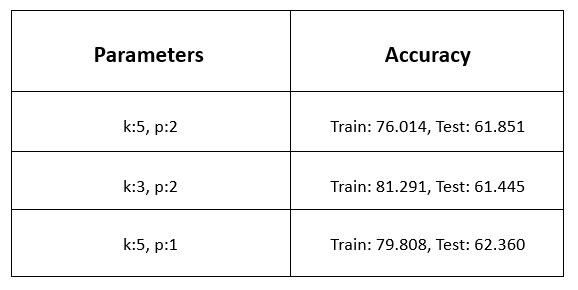

In [114]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.37639877924720244
RMSE: 0.6135134711212155
MAE: 0.37639877924720244
R2: -0.5621268736846632


Text(50.722222222222214, 0.5, 'Prediction Label')

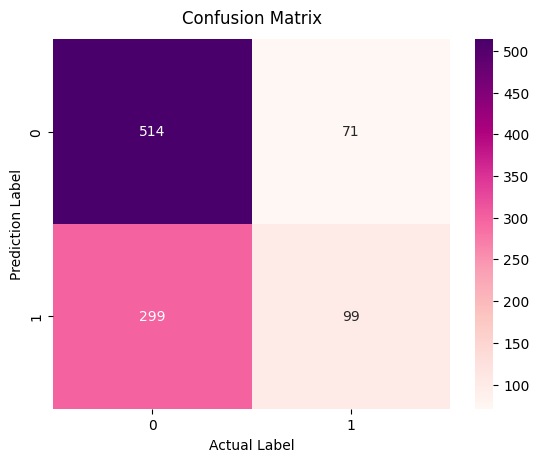

In [115]:
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

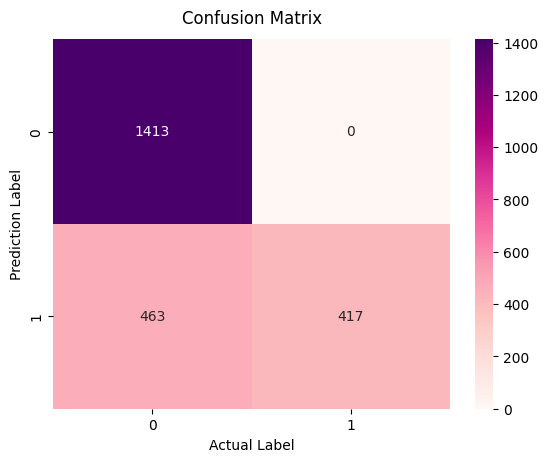

In [116]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


# DECISION TREE IMPLEMENTATION
**Hyperparamter in Decision Tree is**

1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
2. max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
3. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.(default='best')


**RESULT 1**

In [117]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 72.18
Test Accuracy: 71.31230925737539
Confusion Matrix:
[[510  75]
 [207 191]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.87      0.78       585
           1       0.72      0.48      0.58       398

    accuracy                           0.71       983
   macro avg       0.71      0.68      0.68       983
weighted avg       0.71      0.71      0.70       983




**RESULT 2**

In [118]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 78.46
Test Accuracy: 61.444557477110884
Confusion Matrix:
[[492  93]
 [286 112]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.84      0.72       585
           1       0.55      0.28      0.37       398

    accuracy                           0.61       983
   macro avg       0.59      0.56      0.55       983
weighted avg       0.60      0.61      0.58       983



**RESULT 3**

In [119]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 91.84
Test Accuracy: 76.19532044760936
Confusion Matrix:
[[502  83]
 [151 247]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       585
           1       0.75      0.62      0.68       398

    accuracy                           0.76       983
   macro avg       0.76      0.74      0.74       983
weighted avg       0.76      0.76      0.76       983



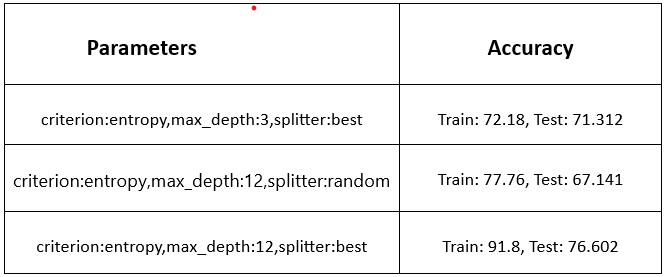



In [120]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.2380467955239064
0.48790039508480254
0.2380467955239064
0.012060301507537341


Text(50.722222222222214, 0.5, 'Prediction Label')

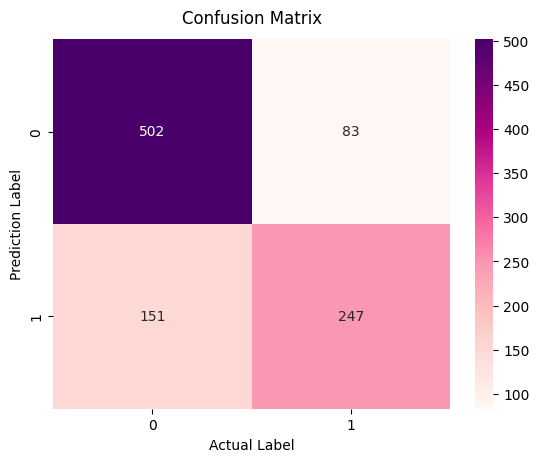

In [121]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

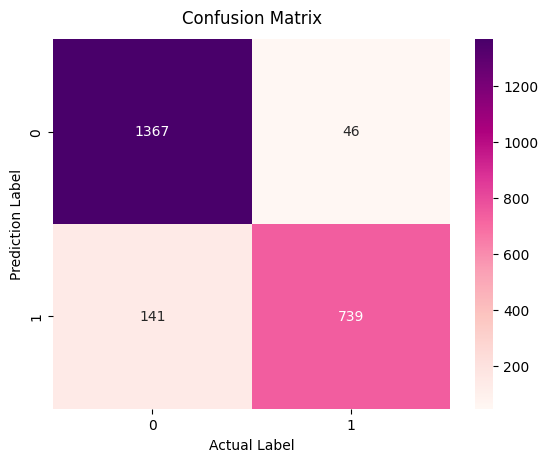

In [122]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Training Accuracy: 72.17618839947667
Testing Accuracy: 71.31230925737539


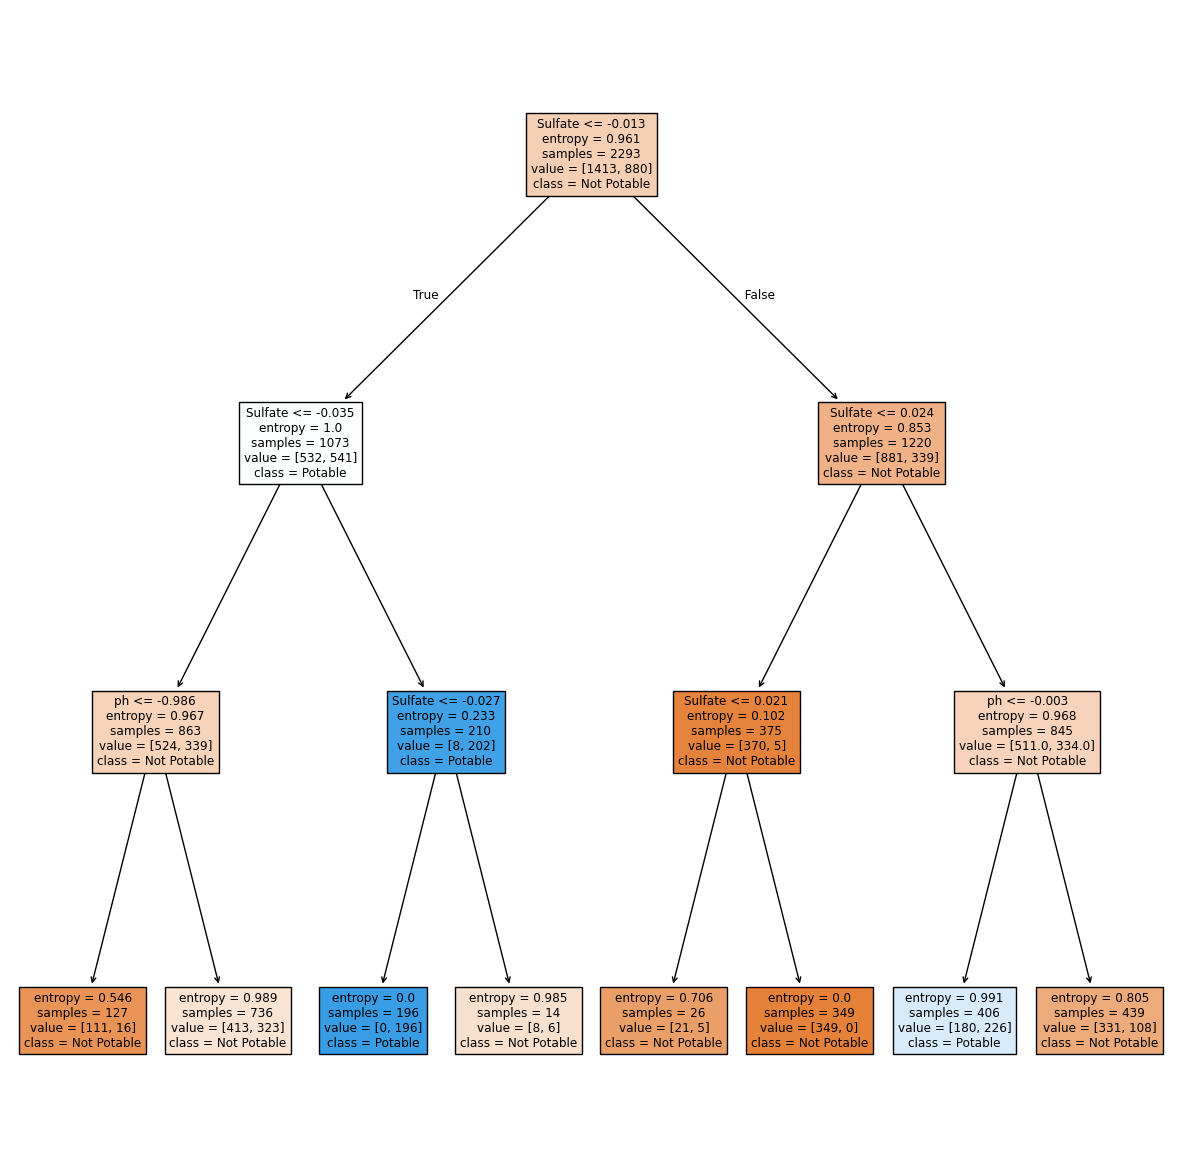

In [123]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

# Print accuracy
print("Training Accuracy:", metrics.accuracy_score(y_train, model.predict(x_train)) * 100)
print("Testing Accuracy:", metrics.accuracy_score(y_test, model.predict(x_test)) * 100)

# Plot the decision tree
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
tree.plot_tree(model,
               impurity=True,
               class_names=['Not Potable', 'Potable'],  # Provide readable class names
               feature_names=X.columns,
               filled=True)
plt.show()


# RANDOM FOREST IMPLEMENTATION
**Hyperparamter in Random Forest is**

1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
2. max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
3. n_estimators: n_estimators is the parameter used here to predict accuracy, it is the number of trees in the foreset.(default = 100)


**RESULT 1**

In [124]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[550  35]
 [165 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       585
           1       0.87      0.59      0.70       398

    accuracy                           0.80       983
   macro avg       0.82      0.76      0.77       983
weighted avg       0.81      0.80      0.79       983

Accuracy: 79.65412004069175


**RESULT 2**

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)


In [127]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[551  34]
 [178 220]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       585
           1       0.87      0.55      0.67       398

    accuracy                           0.78       983
   macro avg       0.81      0.75      0.76       983
weighted avg       0.80      0.78      0.77       983

Accuracy: 78.43336724313326


**RESULT 3**

In [128]:
import pickle
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier1.fit(x_train, y_train)
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(classifier1, model_file)
rf_pred = classifier1.predict(x_test)

In [129]:
pip install flask

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [130]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[544  41]
 [150 248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       585
           1       0.86      0.62      0.72       398

    accuracy                           0.81       983
   macro avg       0.82      0.78      0.79       983
weighted avg       0.81      0.81      0.80       983

Accuracy: 80.56968463886062


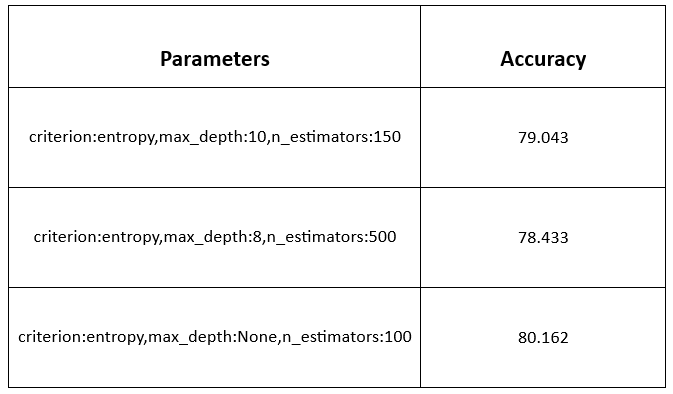

In [131]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,rf_pred))

0.1943031536113937
0.4407983139842911
0.1943031536113937
0.193604776016836


Text(50.722222222222214, 0.5, 'Prediction Label')

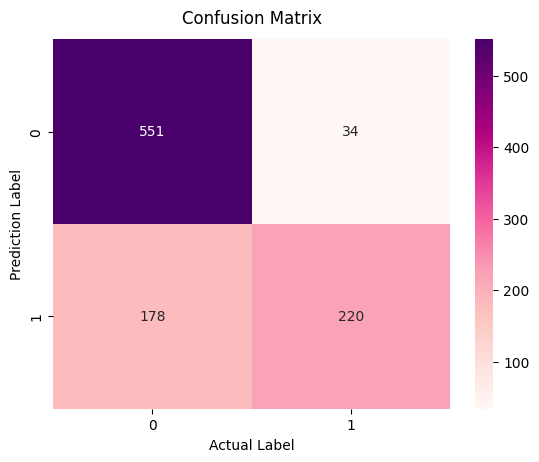

In [132]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

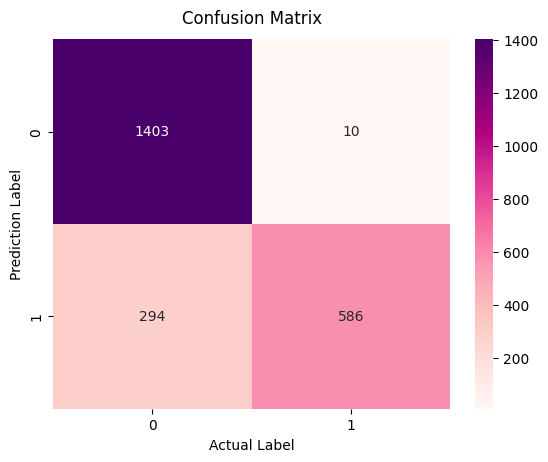

In [133]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [134]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

importance
feature                    
Sulfate               0.399
ph                    0.243
Hardness              0.069
Chloramines           0.062
Solids                0.058
Trihalomethanes       0.048
Turbidity             0.042
Organic_carbon        0.040
Conductivity          0.039

<Axes: xlabel='feature'>

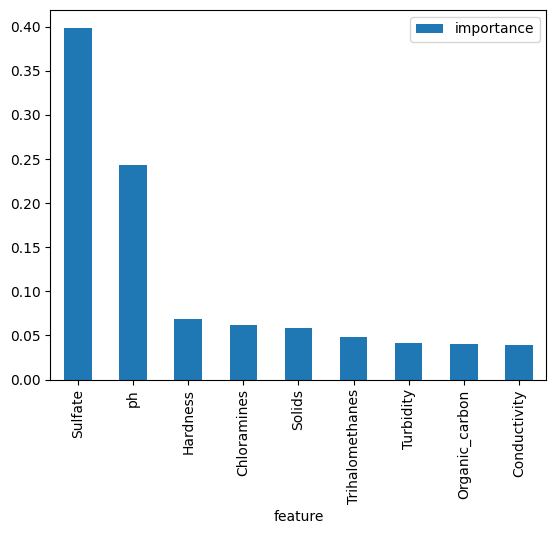

In [135]:
importances.plot.bar()

**NAIVE BAIYES IMPLEMENTATION**

In [136]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
g_pred = gaussian.predict(x_test)
train_acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(x_test, g_pred) * 100, 2)

In [137]:
result = confusion_matrix(y_test, g_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, g_pred)
print("Classification Report:",)
print (result1)
print('Train Accuracy:',train_acc_gaussian)
print('Test Accuracy:',test_acc_gaussian)

Confusion Matrix:
[[515  70]
 [305  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.23      0.33       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.53       983
weighted avg       0.60      0.62      0.57       983

Train Accuracy: 63.15
Test Accuracy: 100.0


Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features.

In [138]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, g_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, g_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, g_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,g_pred))

0.3814852492370295
0.6176449216475672
0.3814852492370295
-0.5832366963020235


# LOGISTIC REGRESSION IMPLEMENTATION
**Hyperparamter in Logistic Regression is**

1. n_jobs: n_jobs specifies the number of CPU cores used for key machine learning tasks.(default:None, Maximum number of iterations taken for the solvers to converge.)
2. max_depth: max_depth: Indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. (Default value is none i.e. nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
3. random_state: Random state ensures that the splits that you generate are reproducible. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.(default=None)

In [139]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=100,random_state=1, n_jobs=10)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  61.75
Test Accuracy: 59.5116988809766
Confusion Matrix:
[[585   0]
 [398   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



In [140]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  61.75
Test Accuracy: 59.5116988809766
Confusion Matrix:
[[585   0]
 [398   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



In [141]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, lr_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lr_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,lr_pred))

0.40488301119023395
0.6363041813395807
0.40488301119023395
-0.6803418803418808


Text(50.722222222222214, 0.5, 'Prediction Label')

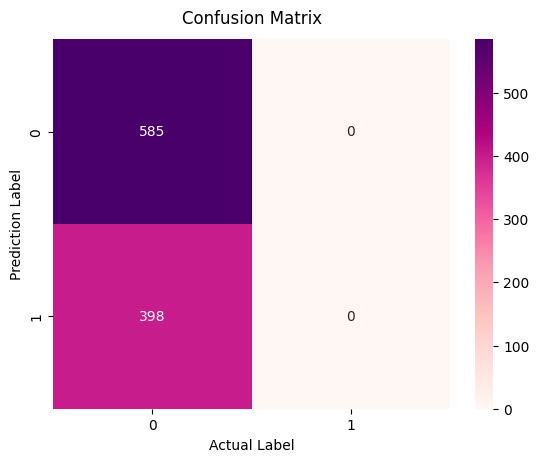

In [142]:
sns.heatmap(data=confusion_matrix(y_test, lr_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


Text(50.722222222222214, 0.5, 'Prediction Label')

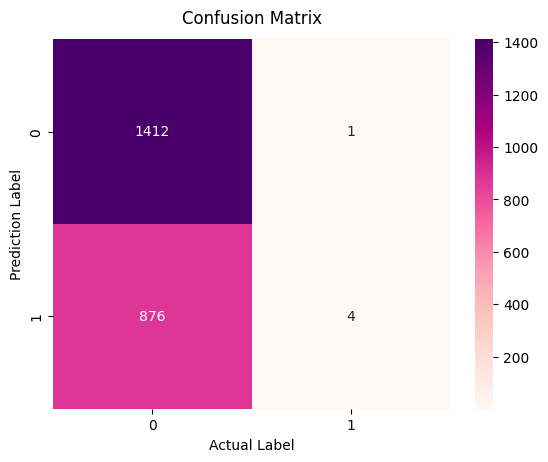

In [143]:
sns.heatmap(data=confusion_matrix(y_train, lr_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION

In [144]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
test_acc_sgd = round(sgd.score(x_test, sgd_pred) * 100, 2)
print('Accuracy on training data : ', acc_sgd)
print('Accuracy on test data : ', test_acc_sgd)
result = confusion_matrix(y_test,sgd_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, sgd_pred)
print("Classification Report:",)
print (result1)

Accuracy on training data :  59.92
Accuracy on test data :  100.0
Confusion Matrix:
[[549  36]
 [361  37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73       585
           1       0.51      0.09      0.16       398

    accuracy                           0.60       983
   macro avg       0.56      0.52      0.45       983
weighted avg       0.56      0.60      0.50       983



In [145]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, sgd_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, sgd_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, sgd_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,sgd_pred))

0.40386571719226855
0.6355043014742454
0.40386571719226855
-0.6761199158184088


Text(50.722222222222214, 0.5, 'Prediction Label')

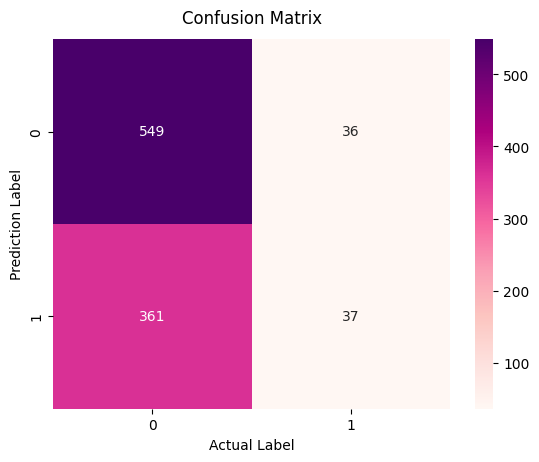

In [146]:
sns.heatmap(data=confusion_matrix(y_test, sgd.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

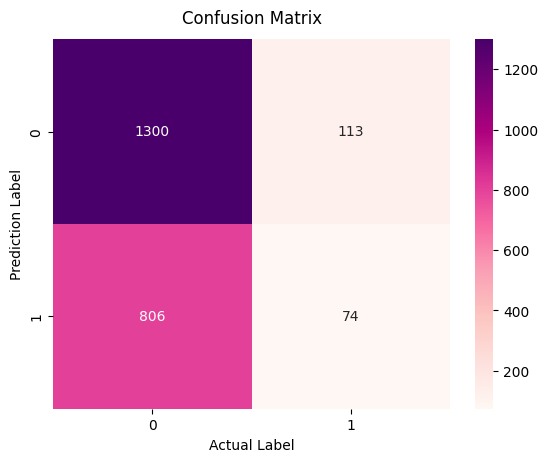

In [147]:
sns.heatmap(data=confusion_matrix(y_train, sgd.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# SVM: SUPPORT VECTOR MACHINE IMPLEMENTATION

In [148]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

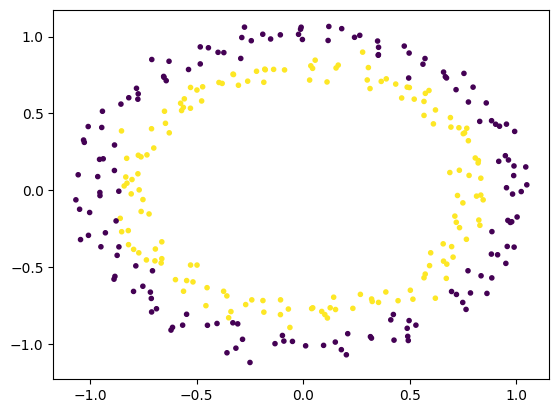

In [149]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()



Now that you can see how the data are separated, we can choose a non-linear SVM to start with.

In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF) One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.

**Hyperparamter in SVM is**

1. kernel: In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF)
One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.
This type of model uses the kernel of the normal (or Gaussian) probability density function (PDF) as the basis function. In this, basis function determines the spacing between the different basis functions that combine to form the model

In [150]:
classifier1 = svm.SVC(kernel='rbf')

classifier1.fit(x_train,y_train)

x_train_prediction = classifier1.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)* 100

print('Accuracy on training data : ', training_data_accuray)

x_test_prediction = classifier1.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)* 100

print('Accuracy on test data : ', test_data_accuray)

result = confusion_matrix(y_test,x_test_prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, x_test_prediction)
print("Classification Report:",)
print (result1)

Accuracy on training data :  73.13563017880506
Accuracy on test data :  66.4292980671414
Confusion Matrix:
[[540  45]
 [285 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.92      0.77       585
           1       0.72      0.28      0.41       398

    accuracy                           0.66       983
   macro avg       0.68      0.60      0.59       983
weighted avg       0.68      0.66      0.62       983




# XGBOOST
**Hyperparameters in XGBoost:**

1. learning_rate: It’s a regularization parameter. Shrinks feature weights in each boosting step. (Can range from 0-1; increases accuracy when increased)
max_depth: Maximum tree depth. (Can range from 0-infinity; increases accuracy when increased)
2. n_estimators: Number of trees boosted. (Can range from 1-infinity; decreases accuracy when increased; default value = 100)
3. scale_pos_weight: Dealing with imbalanced data. (increases accuracy when increased)


**RESULT 1**

In [152]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=2)
xgb_model.fit(x_train, y_train)

ImportError: sklearn needs to be installed in order to use this module

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  38.37767117313563
Accuracy on testing data :  40.4883011190234


In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,
                            max_depth =20,
                            n_estimators = 80,
                              scale_pos_weight=5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  84.95420846053206
Accuracy on testing data :  66.63275686673448


**RESULT 3**

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  61.62232882686437
Accuracy on testing data :  59.5116988809766


In [ ]:
xgb_pred = xgb_model.predict(x_test)
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, xgb_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test, xgb_pred))

0.3336724313326551
0.5776438620228342
0.3336724313326551
-0.3848043636988365


Text(50.722222222222214, 0.5, 'Prediction Label')

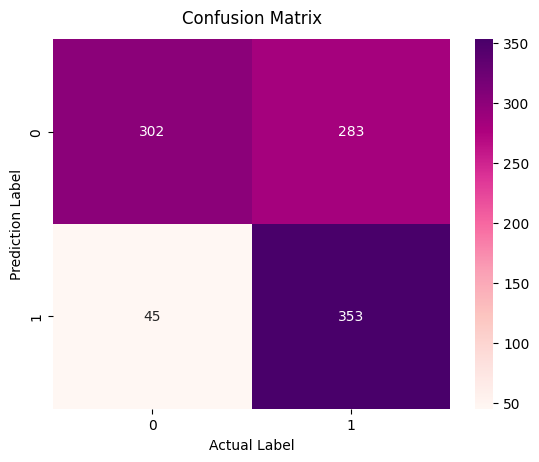

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, xgb_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

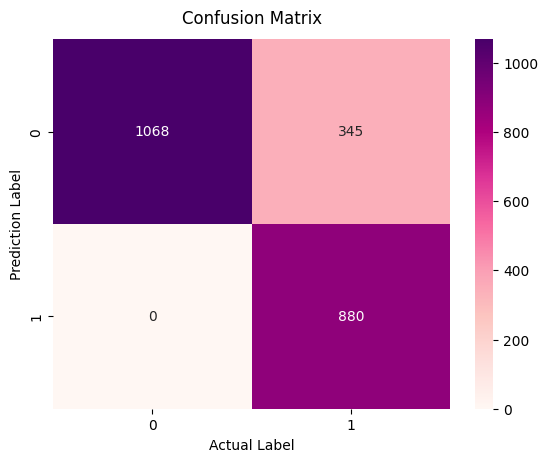

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, xgb_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# FURTHER EVALUATION

In [153]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[1330,   83],
       [ 400,  480]])

The first row is about the not-potable-predictions: 1200 values were correctly classified as not potable for water consumption (called true negatives) and 188 were wrongly classified as not potable (false positives). The second row is about the ptable-predictions: 610 values were wrongly classified as potable (false negatives) and 295 were correctly classified as survived (true positives).

In [154]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8525754884547069
Recall: 0.5454545454545454


In [156]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

np.float64(0.6652806652806653)

In [4]:
# Ensure 'Potability' column is an integer
df['Potability'] = df['Potability'].astype(int)


The percentage of waters that are potable is: 39.01%


C:\Users\Jeeva M\AppData\Local\Temp\ipykernel_24672\2638410162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Potability", data=df, palette={'0': 'pink', '1': 'purple'})


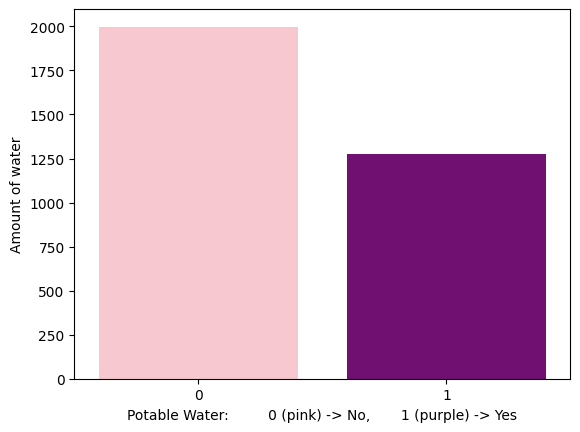

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Potability' column is of string type to match the palette keys
df['Potability'] = df['Potability'].astype(str)

# Plot with palette using string keys
sns.countplot(x="Potability", data=df, palette={'0': 'pink', '1': 'purple'})
plt.xlabel('Potable Water:         0 (pink) -> No,       1 (purple) -> Yes')
plt.ylabel('Amount of water')

# Calculate and display percentage
porc = (len(df[df.Potability == '1']) / len(df.Potability)) * 100
print('The percentage of waters that are potable is: {:.2f}%'.format(porc))


In [157]:
import pandas as pd

# Sample data with train and test accuracy for each model
results = {
    'Model': [
        'K-Nearest Neighbors',
        'Decision Tree',
        'Random Forest(Best accuracy)',
        'Naive Bayes',
        'Logistic Regression',
        'Stochastic Gradient Descent',
        'Support Vector Machine',
        'XGBoost'
    ],
    'Train Accuracy (%)': [
        79.808,
        91.8,
        100,       # Update with actual value if available
        63.15,
        61.75,
        62.01,
        73.14,
        84.95
    ],
    'Test Accuracy (%)': [
        62.36,
        76.602,
        80.162,
        100.0,
        59.51,
        100.0,
        66.43,
        66.63
    ]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Display in tabular format
print(df_results)


                          Model  Train Accuracy (%)  Test Accuracy (%)
0           K-Nearest Neighbors              79.808             62.360
1                 Decision Tree              91.800             76.602
2  Random Forest(Best accuracy)             100.000             80.162
3                   Naive Bayes              63.150            100.000
4           Logistic Regression              61.750             59.510
5   Stochastic Gradient Descent              62.010            100.000
6        Support Vector Machine              73.140             66.430
7                       XGBoost              84.950             66.630


# **Conclusion**

For the water potability prediction task, Random Forest offers the best trade-off between accuracy, low error, and robust predictive power. This model is less prone to overfitting compared to individual decision trees and is generally more reliable than simpler models like Logistic Regression and Naive Bayes, especially when accuracy and interpretability are critical.